In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import warnings
warnings.filterwarnings("ignore")
import numpy as np


In [2]:



train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]
total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
total_data['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [3]:
total_data['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [5]:
total_data['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [5]:
total_data.shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
total_data.drop("PassengerId", axis = 1).duplicated().sum()

0

##### En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de drop_duplicates().

In [7]:
total_data = total_data.drop_duplicates(subset = total_data.columns.difference(['PassengerId']))
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Excluiríamos de nuevo la columna identificativa. Aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis

In [8]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Eliminar información irrelevante. Aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros de que el algoritmo no va a utilizar en el proceso predictivo, estas son PassengerId, Name, Ticket y Cabin.

In [9]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### Análisis sobre variables categóricas. Se pueden comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son Survived, Sex, Pclass, Embarked, SibSp y Parch

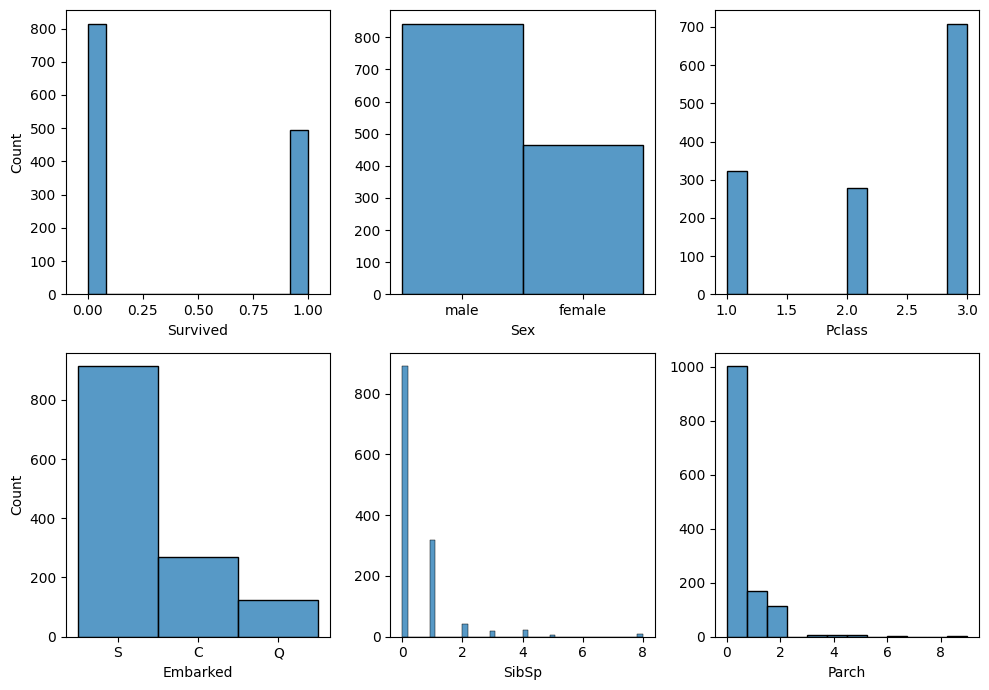

In [10]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

##### Análisis sobre variables numéricas. Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son Fare, Age y PassengerId. Sin embargo, esta última carece de sentido, así que graficaremos las dos primeras.

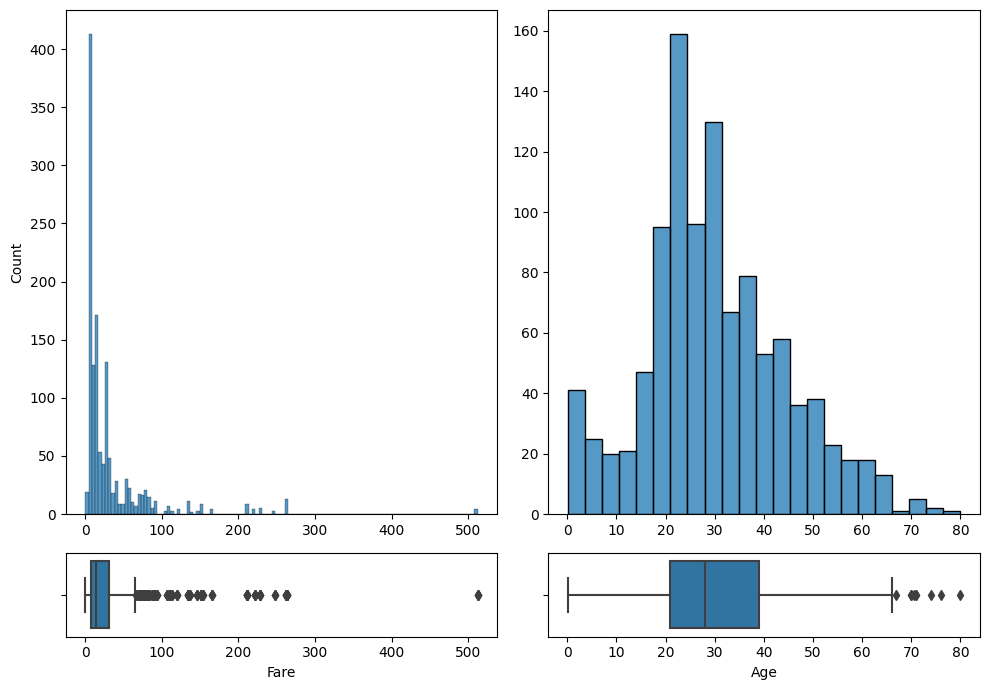

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [12]:
total_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [13]:
nulos_cabin=total_data[pd.isnull(total_data.Embarked)]
nulos_cabin
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


##### Análisis numérico-numérico. Cuando las dos variables que se comparan tienen datos numéricos, se dice que el análisis es numérico-numérico. Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.

##### Survived - (Fare, Age)

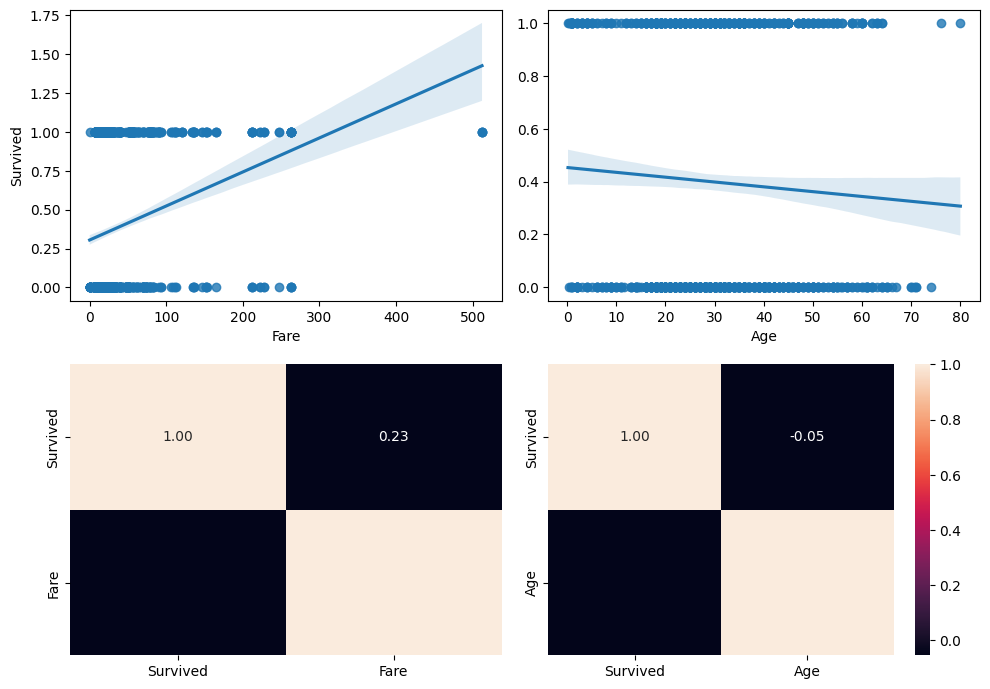

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Fare", y = "Survived")
sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

##### Analisis Fare - Age

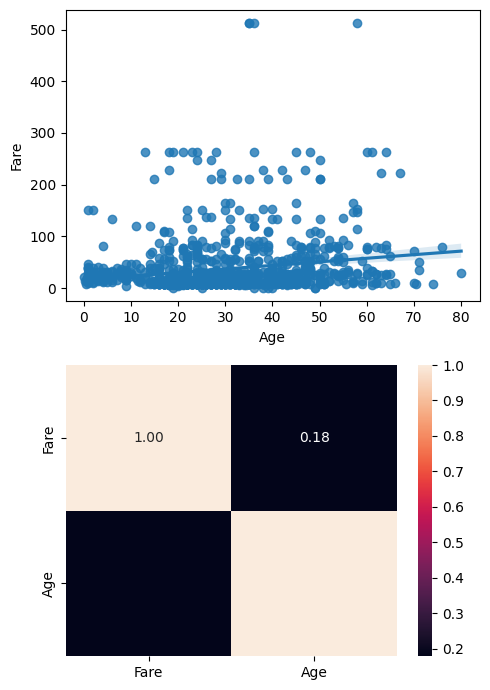

In [15]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Fare")
sns.heatmap(total_data[["Fare", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


##### Análisis categórico-categórico. Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas categóricas se utilizan histogramas y combinaciones.

##### Survived - (Sex, Pclass, Embarked, SibSp, Parch).Primero analizamos la clase frente a las características categóricas, una a una. Aquí no habrá combinaciones de varias predictoras y la clase.

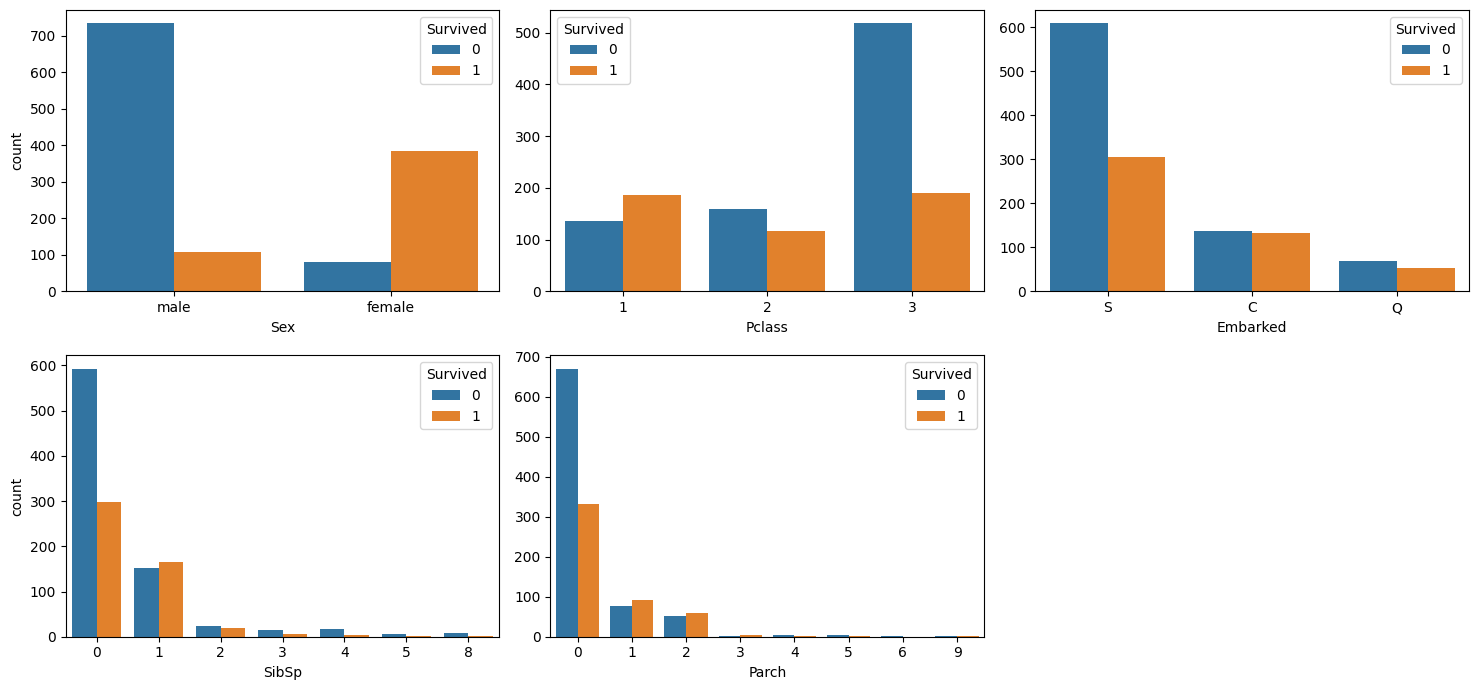

In [16]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

##### Combinaciones de la clase con varias predictoras. La clase y el sexo del pasajero frente a su supervivencia podría ser un análisis digno de estudio, entre otras casuísticas que se presentan a continuación:

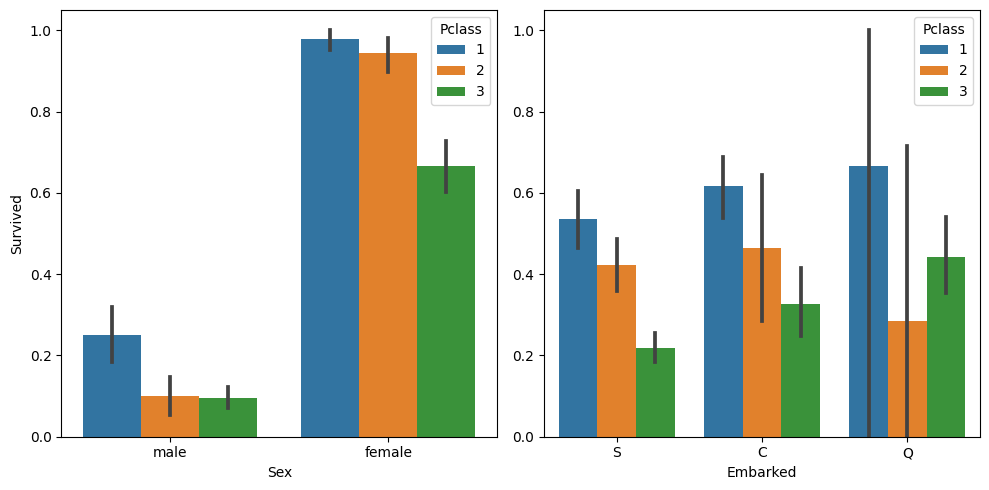

In [17]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()

##### This line of code is using the pd.factorize function from the pandas library to convert the categorical values in the "Sex" column of the total_data dataframe into numerical values.

This is a common technique in data preprocessing, as many machine learning algorithms require numerical input. By converting categorical values to numerical values, you can use these values as input to your machine learning model.

In [23]:
# Factorize Funtion: Encode the object as an enumerated type or categorical variable.

codes, uniques = pd.factorize(np.array(['b', 'b', 'a', 'c', 'b'], dtype="O"))
codes, uniques


(array([0, 0, 1, 2, 0], dtype=int64), array(['b', 'a', 'c'], dtype=object))

##### Analisis de Correlaciones. Variables Categoricas. El objetivo del análisis de correlaciónes con datos categóricos-categóricos es descubrir patrones y dependencias entre variables, lo que ayuda a entender cómo interactúan dentro de un conjunto de datos.

               Sex_n    Pclass  Embarked_n     SibSp     Parch  Survived
Sex_n       1.000000 -0.124617    0.116904  0.109609  0.213125  0.688371
Pclass     -0.124617  1.000000    0.042356  0.060832  0.018322 -0.264710
Embarked_n  0.116904  0.042356    1.000000 -0.072110 -0.094181  0.108275
SibSp       0.109609  0.060832   -0.072110  1.000000  0.373587  0.002370
Parch       0.213125  0.018322   -0.094181  0.373587  1.000000  0.108919
Survived    0.688371 -0.264710    0.108275  0.002370  0.108919  1.000000


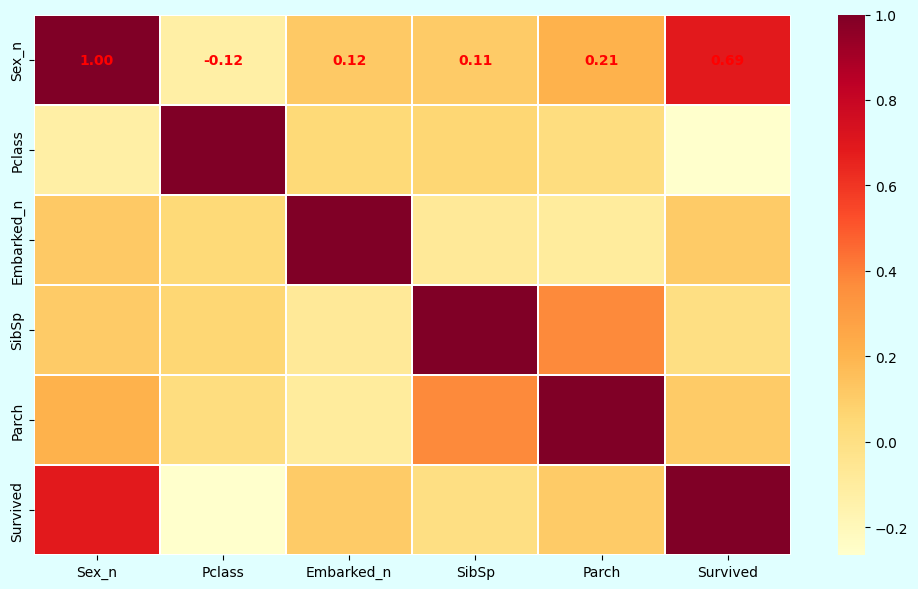

In [54]:
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

#cmap = Blues BuGn BuPu GnBu OrRd PuBu PuBuGn PuRd RdBu RdGy RdPu YlGn YlGnBu YlOrBr YlOrRd

fig, axis = plt.subplots(figsize = (10, 6))
corr_matrix = total_data[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr()
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths=.2,linecolor="white",
            annot_kws={"size": 10, "color": "red", "weight": "bold"},cmap="YlOrRd")

plt.tight_layout()

print(corr_matrix)
plt.gcf().set_facecolor('lightcyan')
plt.show()

##### Análisis numérico-categórico (completo). Este es el análisis a mayor detalle que podemos llevar a cabo. Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones. Así, una vez comprobemos que existe alguna relación, podremos profundizar en el estudio. Otro elemento que nos puede ser de mucha ayuda es obtener las relaciones dos a dos entre todos los datos del dataset. Esto es, en parte, redundante porque hay muchas cosas que ya hemos calculado antes y por eso es opcional.

                 Age      Fare     Sex_n    Pclass  Embarked_n     SibSp  \
Age         1.000000  0.178740 -0.063645 -0.408106    0.042363 -0.243699   
Fare        0.178740  1.000000  0.185523 -0.558629    0.058826  0.160238   
Sex_n      -0.063645  0.185523  1.000000 -0.124617    0.116904  0.109609   
Pclass     -0.408106 -0.558629 -0.124617  1.000000    0.042356  0.060832   
Embarked_n  0.042363  0.058826  0.116904  0.042356    1.000000 -0.072110   
SibSp      -0.243699  0.160238  0.109609  0.060832   -0.072110  1.000000   
Parch      -0.150917  0.221539  0.213125  0.018322   -0.094181  0.373587   
Survived   -0.053695  0.233622  0.688371 -0.264710    0.108275  0.002370   

               Parch  Survived  
Age        -0.150917 -0.053695  
Fare        0.221539  0.233622  
Sex_n       0.213125  0.688371  
Pclass      0.018322 -0.264710  
Embarked_n -0.094181  0.108275  
SibSp       0.373587  0.002370  
Parch       1.000000  0.108919  
Survived    0.108919  1.000000  


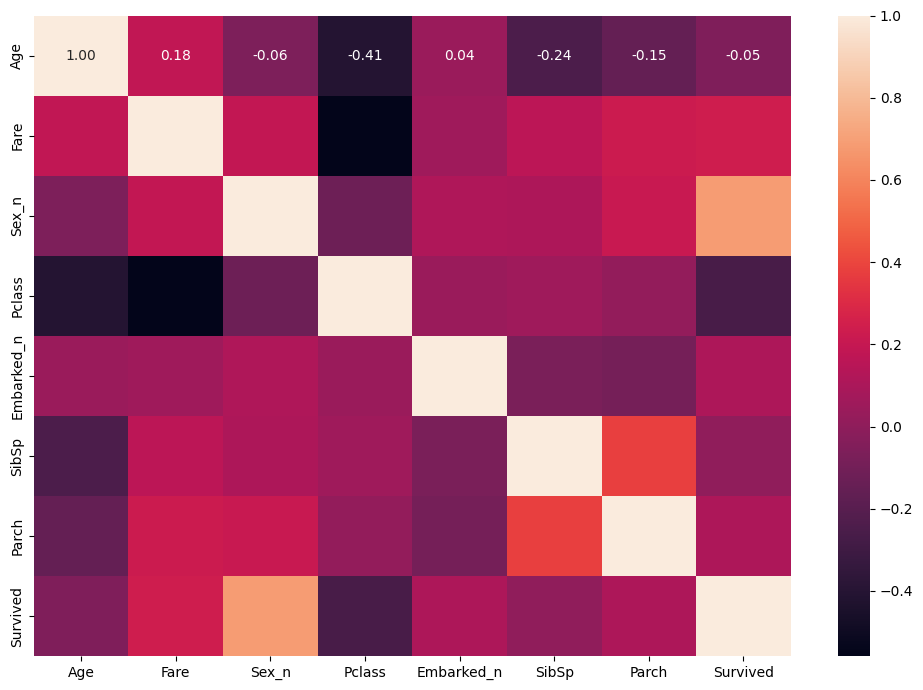

In [59]:
fig, axis = plt.subplots(figsize = (10, 7))
corr_matrix1=total_data[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr()
sns.heatmap(corr_matrix1, annot = True, fmt = ".2f")

plt.tight_layout()
print(corr_matrix1)

plt.show()

##### Existe una relación entre la tipología de clase (Pclass) y la edad del pasajero (Age) fuertemente negativa (los que viajaban en primera clase eran personas con alta edad) y entre la clase y la tarifa pagada (Fare), algo que tiene mucho sentido. El resto de correlaciones se mantienen con respecto a lo visto anteriormente.Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría.

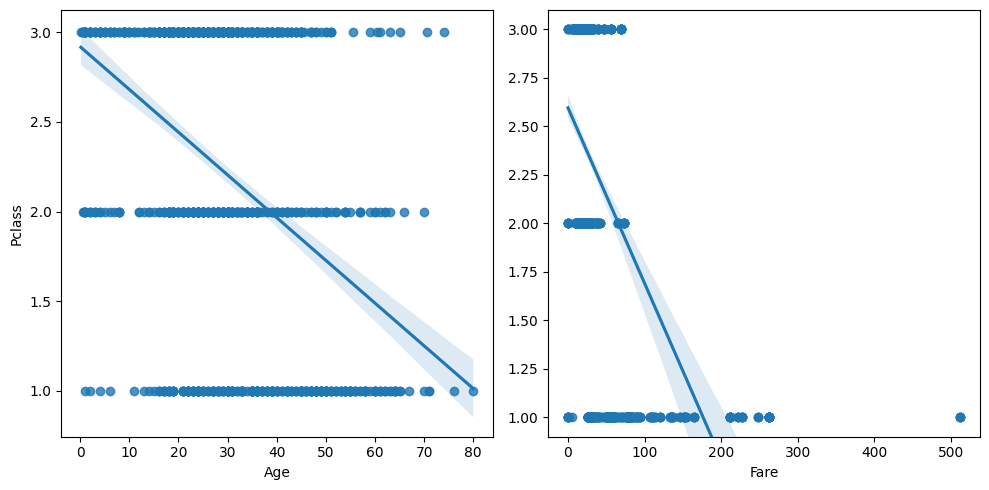

In [60]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = total_data, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

##### Una vez calculada la correlación podemos dibujar el pairplot (es un paso opcional)

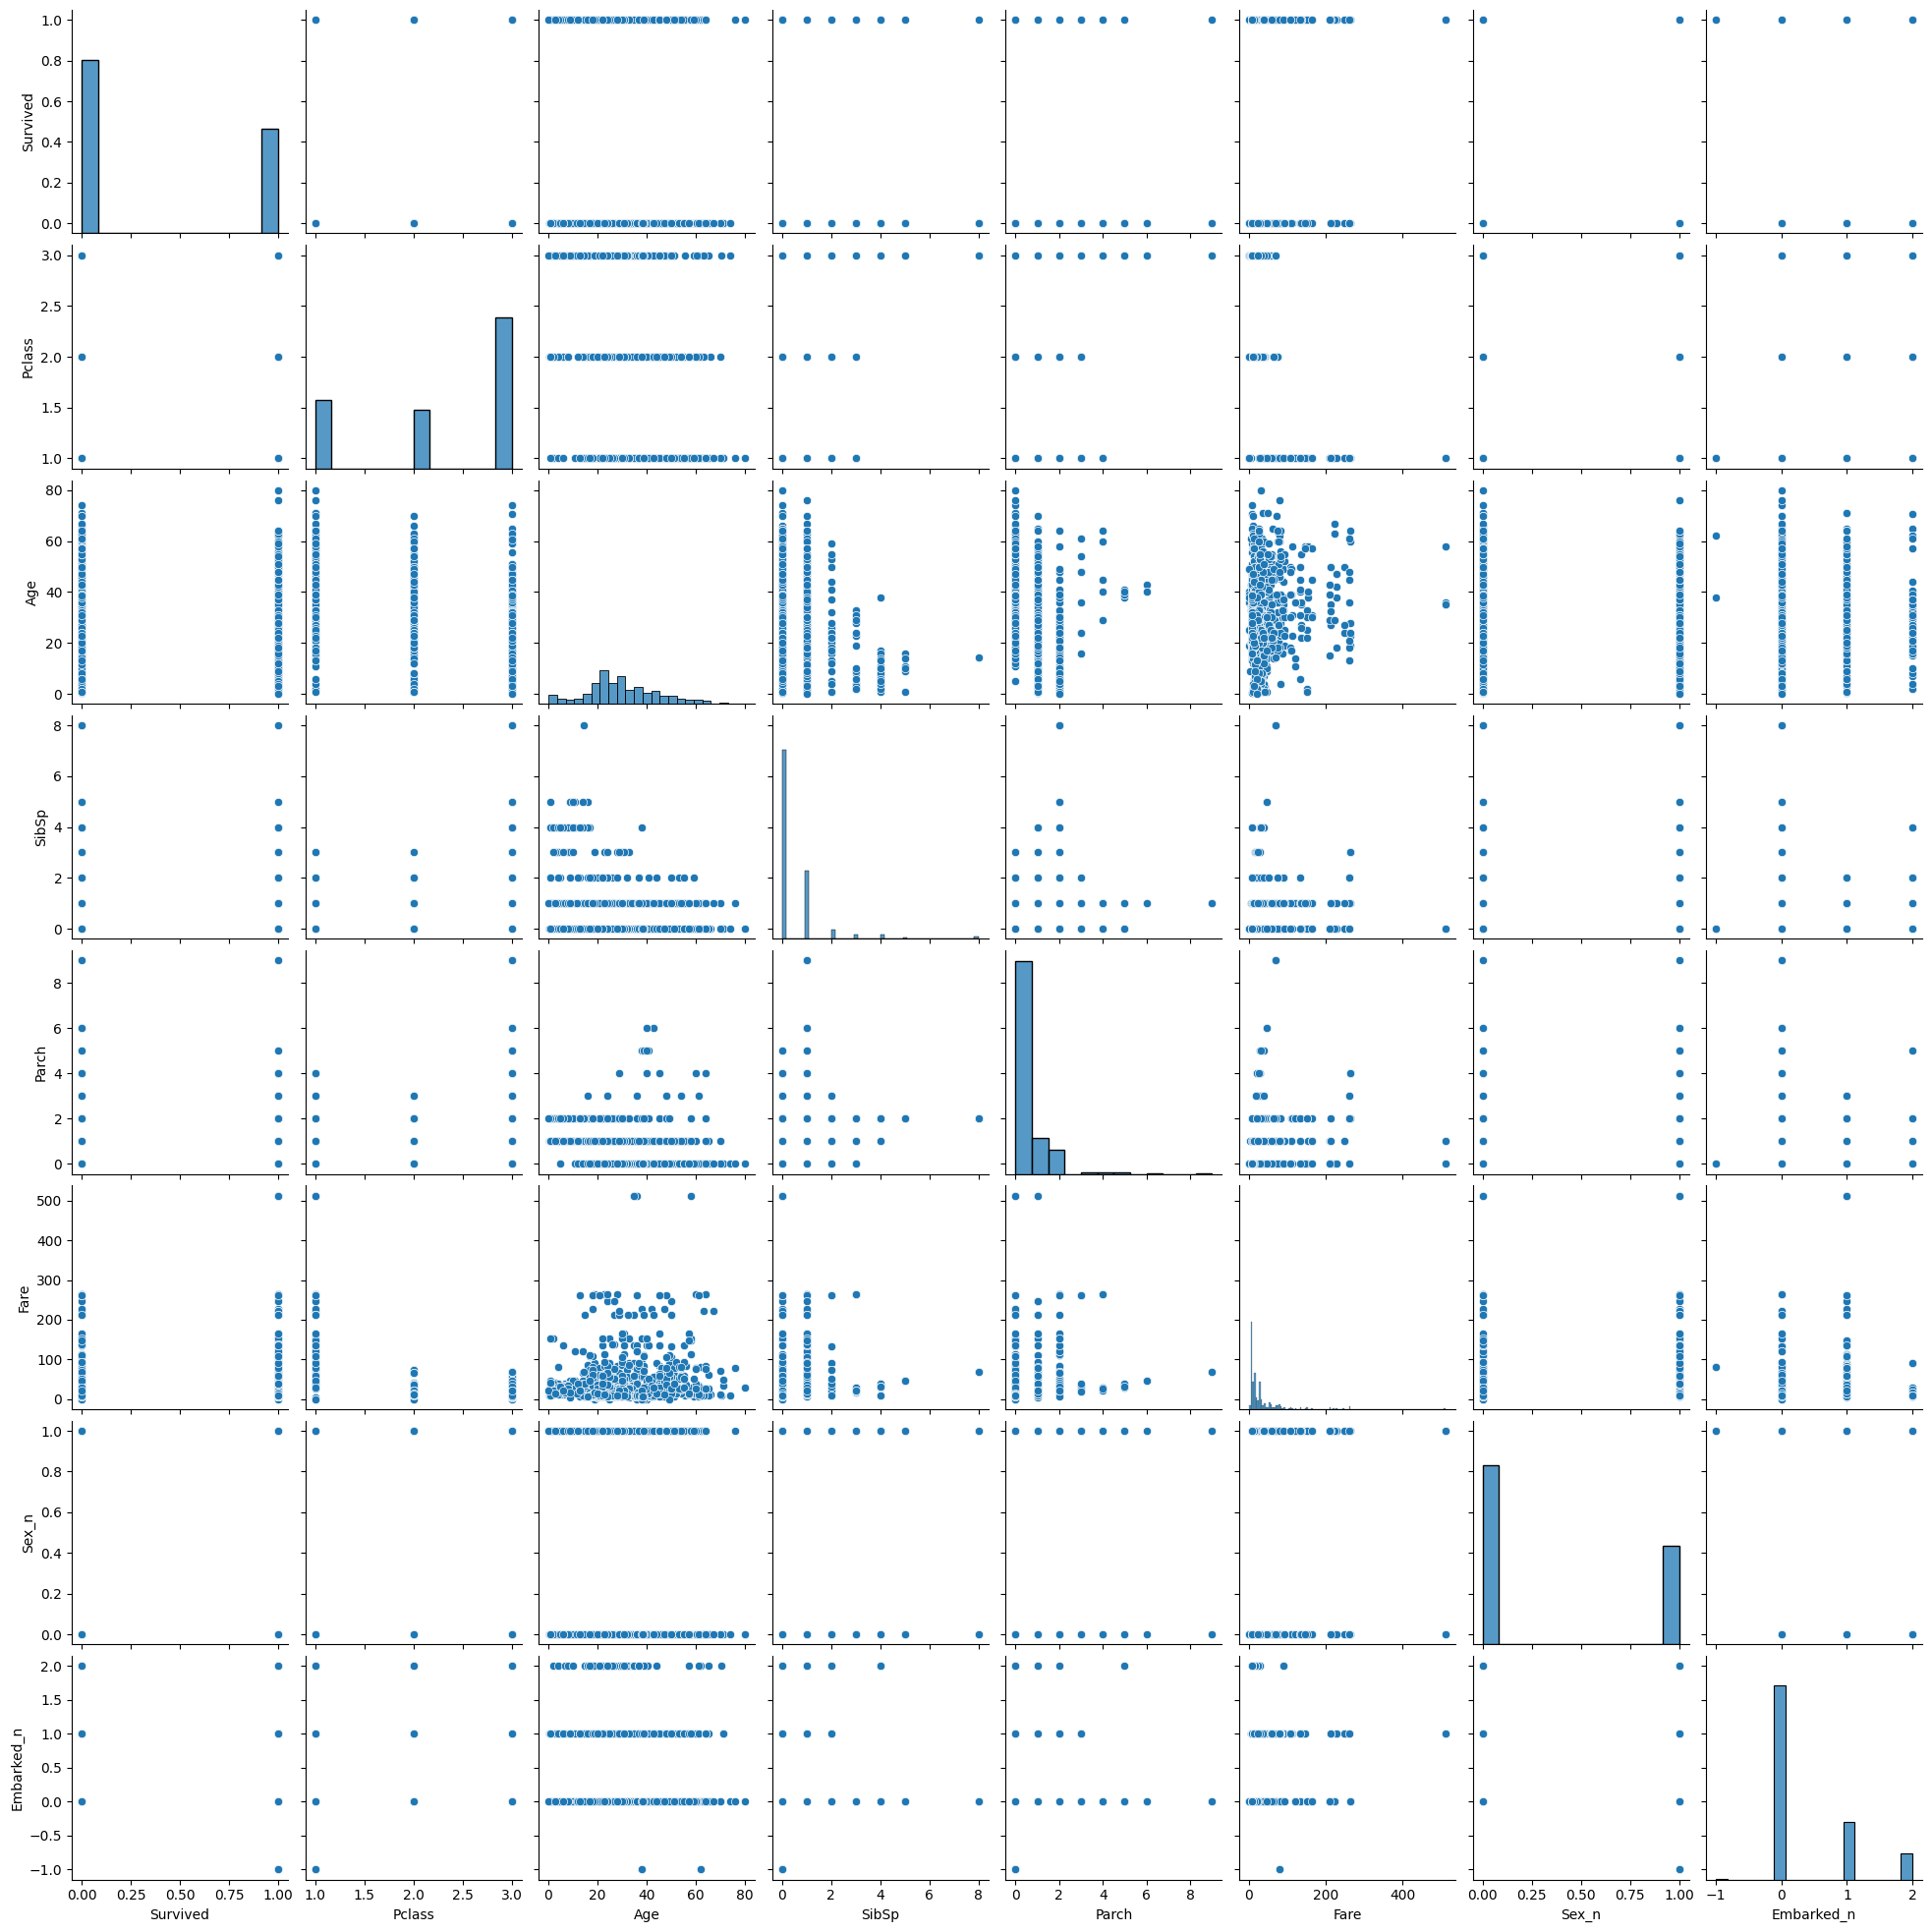

In [62]:
sns.pairplot(data = total_data)
plt.show()

# Ingenieria de Caracteristicas

La ingeniería de características (feature engineering) es un proceso que implica la creación de nuevas características (o variables) a partir de las existentes para mejorar el rendimiento del modelo. Esto puede implicar una variedad de técnicas como la normalización, la transformación de los datos, etcétera. El objetivo es mejorar la precisión del modelo y/o reducir la complejidad del mismo, facilitando así su interpretación.

### Analisis Valores Atipicos (outliers)

Análisis de outliers
Un valor atípico (outlier) es un punto de datos que se desvía significativamente de los demás. Es un valor que es notablemente diferente de lo que sería de esperar dada la tendencia general de los datos. Estos outliers pueden ser causados por errores en la recolección de datos, variaciones naturales en los datos, o pueden ser indicativos de algo significativo, como una anomalía o evento extraordinario.

In [63]:
total_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.355997,0.392666
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668,0.478997,0.655586
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000


##### Como detectar valores atipicos con los graficos de caja

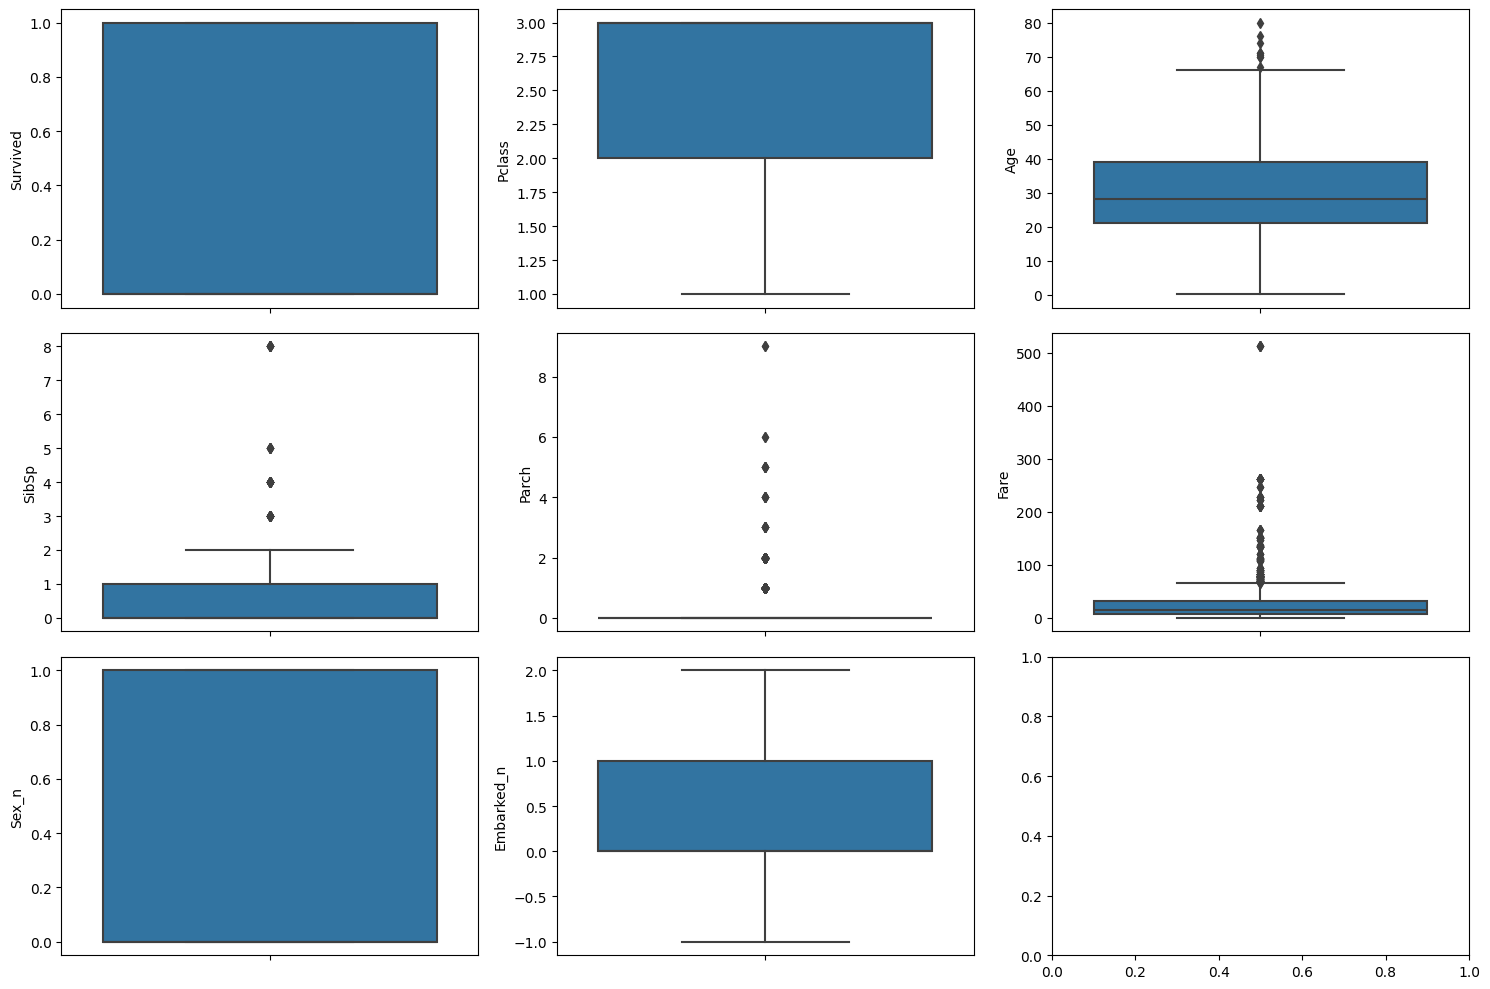

In [64]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

##### Con los valores atipicos podemos hacer lo siguiente: 
- Mantenerlos. En ciertos problemas de Machine Learning, un valor atípico puede decantar la predicción hacia una clase u otra (esto es muy común, por ejemplo, para detectar riesgos). Por lo tanto, podría ser una política que en ciertos casos tuviera sentido. Normalmente no se utiliza.
- Eliminarlos. Aquellas instancias que cuenten con características atípicas se eliminan del conjunto de datos. Sin embargo, si hay muchos valores atípicos, esta estrategia puede causar que se pierda gran parte de la información disponible.
- Reemplazarlos. Si no queremos eliminar instancias completas por la presencia de outliers en una de sus características, podemos reemplazarlos tomándolos en cuenta como valores faltantes y reutilizando la política.

Por ejemplo, si queremos aplicar el segundo punto de los anteriores para el caso de la columna Fare

In [65]:
fare_stats = total_data["Fare"].describe()
fare_stats

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [66]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.34 y -27.17, con un rango intercuartílico de 23.38


Basándonos en estos resultados, deberíamos eliminar los registros de los pasajeros cuyo importe de billete supere los 65 dólares.

Sin embargo, nuestro criterio es muy importante aquí y, según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 300. Veamos cuántos valores representan ese valor extremo de 512

In [67]:
total_data[total_data["Fare"] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1
1234,1,1,female,58.0,0,1,512.3292,C,1,1


En este caso vemos que todos ellos sobrevivieron, quizá sí que hay un impacto real sobre el precio de billete tan elevado y la supervivencia final. Por lo tanto, sumado al análisis univariante anterior, existe una implicación entre el precio del billete y el resultado final de supervivencia, por lo que decidimos que mantenemos los valores atípicos.

### Análisis de valores faltantes

Un valor faltante (missing value) es un espacio que no tiene valor asignado en la observación de una variable específica. Este tipo de valores son bastante comunes y pueden surgir por muchas razones. Por ejemplo, podría haber un error en la recopilación de datos, alguien podría haberse negado a responder una pregunta en una encuesta, o simplemente podría ser que cierta información no esté disponible o no sea aplicable.

In [68]:
total_data.isnull().sum().sort_values(ascending=False)

Age           263
Embarked        2
Fare            1
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Sex_n           0
Embarked_n      0
dtype: int64

In [69]:
# Valores faltantes en porcentaje

total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Age           0.200917
Embarked      0.001528
Fare          0.000764
Survived      0.000000
Pclass        0.000000
Sex           0.000000
SibSp         0.000000
Parch         0.000000
Sex_n         0.000000
Embarked_n    0.000000
dtype: float64

Para lidiar con ellos hay muchas técnicas, pero que se resume en los siguientes puntos:

- Eliminarlos. Similar al caso anterior de los outliers.
- Imputación numérica: Para rellenar los valores faltantes en una variable numérica, normalmente el procedimiento es utilizar los valores estadísticos de la muestra. Lo más común es importarlo usando la media, moda o mediana de esa característica.
- Imputación categórica: Cuando la columna es categórica, normalmente se suelen rellenar cogiendo el elemento de la mayor o mejor categoría.

Para los casos con datos faltantes observados en las variables Age, Embarked y Fare, vamos a utilizar la imputación numérica a través de la función fillna(). En este caso vamos a utilizar algunas de las distintas opciones que se pueden escoger para rellenar valores

In [70]:
total_data["Age"].fillna(total_data["Age"].median(), inplace = True)
total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True)
total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True)

total_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    0
dtype: int64

##### Inferencia de nuevas caracteristicas

##### Otro uso típico en esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes. Por ejemplo, en este caso de uso, el del análisis del Titanic, hay dos variables que representan los acompañantes de un pasajero. Por un lado, SibSp contabiliza el número de hermanos que acompañaban al pasajero (incluyendo a su cónyuge, si aplica) y, por otro, Parch contabiliza el número de acompañantes que eran padres e hijos. Uniendo estas dos variables y sumándolas podemos obtener una tercera.

In [71]:
total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0


## Escalado de Valores

##### El escalado de valores (feature scaling) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1. Otra técnica común es el escalado mínimo-máximo, que transforma los datos para que todos los valores estén entre 0 y 1.

### Antes de escalar los valores, debemos dividir convenientemente el conjunto en train y test, lo que prevendrá que los datos de entrenamiento no se contaminen con los datos del conjunto de pruebas. El escalador (scaler) será el encargado de escalar las variables en función del conjunto de entrenamiento.

In [88]:
from sklearn.model_selection import train_test_split

num_variables = ["Pclass", "Age", "Fare", "Sex_n", "Embarked_n", "FamMembers"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Survived", axis = 1)[num_variables]  # Dropea la tabla y solo deja las variables del estudio definidas en num_variables
y = total_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,2,57.0,10.500,1,0,0
543,2,32.0,26.000,0,0,1
289,3,22.0,7.750,1,2,0
10,3,4.0,16.700,1,0,2
147,3,9.0,34.375,1,0,4


##### This is a Python code snippet that uses the train_test_split() function from Scikit-learn to split a dataset X and its corresponding labels y into training and testing sets.

- X: Columnas referidas a las variables predictoras del modelo. X_test contiene el 20% de la data, el resto esta en X_train
- y: Variable a predecir u objetivo, en este caso la variable survived (1 y 0), el 20% esta en y_test, el resto en y_train

### NOTA: Sólo se deben escalar las variables predictoras, nunca la objetivo.

### Normalización

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,-0.331309,2.160657,-0.467908,1.355507,-0.586065,-0.555242
543,-0.331309,0.190910,-0.150474,-0.737732,-0.586065,0.062546
289,0.852582,-0.596989,-0.524227,1.355507,2.536631,-0.555242
10,0.852582,-2.015207,-0.340935,1.355507,-0.586065,0.680333
147,0.852582,-1.621257,0.021043,1.355507,-0.586065,1.915909


### Escalado Minimo - Maximo

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,0.5,0.749440,0.020495,1.0,0.333333,0.0
543,0.5,0.419755,0.050749,0.0,0.333333,0.1
289,1.0,0.287881,0.015127,1.0,1.000000,0.0
10,1.0,0.050508,0.032596,1.0,0.333333,0.2
147,1.0,0.116445,0.067096,1.0,0.333333,0.4


##### NOTA: En este paso debemos asegurar que todas nuestras variables son numéricas, y, si no, como hemos visto en los pasos del principio, deberíamos transformarlas, como hemos hecho con Sex y Embarked.

### Seleccion de Caracteristicas

##### La selección de características (feature selection) es un proceso que implica seleccionar las características (variables) más relevantes de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning, desechando el resto.

##### Existen varias razones para incluirlo en nuestro análisis exploratorio:

- Simplificar el modelo para que sea más fácil de entender e interpretar.
- Reducir el tiempo de entrenamiento del modelo.
- Evitar el sobre ajuste al reducir la dimensionalidad del modelo y minimizar el ruido y las correlaciones innecesarias.
- Mejorar el rendimiento del modelo al eliminar las características irrelevantes.

##### Además, existen diversas técnicas para la selección de características. Muchas de ellas se basan a su vez en modelos supervisados, entrenados o de clustering.

##### La librería sklearn contiene gran parte de las mejores alternativas para llevarla a cabo. Una de las herramientas que más se utilizan para realizar procesos de selección de características rápidos y con buenos resultados es SelectKBest. Esta función selecciona las k mejores características de nuestro conjunto de datos basándose en una función de un test estadístico. Este test estadístico normalmente es un ANOVA o un Chi-Cuadrado.

##### En resumen, el siguiente fragmento de código utiliza la clase SelectKBest de Scikit-learn para seleccionar las 5 funciones principales según el valor F de ANOVA. Ajusta el modelo a las etiquetas y los datos de entrenamiento, recupera una máscara booleana de las funciones seleccionadas y transforma los datos de entrenamiento y de prueba para que contengan solo las funciones seleccionadas. Los DataFrames X_train_sel y X_test_sel resultantes contienen solo las 5 características principales que fueron seleccionadas por el modelo SelectKBest.

##### sklearn.feature_selection import f_classif, SelectKBest: Esta línea importa la función f_classif y la clase SelectKBest del módulo sklearn.feature_selection. 
- **Selección_modelo = SelectKBest(f_classif, k = 5):** Crea una instancia de la clase SelectKBest, que es un método de selección de características que selecciona las k características principales en función de una función de puntuación. En este caso, la función de puntuación es f_classif, que es una función que calcula el valor F de ANOVA para cada característica. El parámetro k se establece en 5, lo que significa que se seleccionarán las 5 funciones principales. 

- **Select_model.fit(X_train, y_train):** Ajusta el modelo SelectKBest a los datos de entrenamiento X_train y las etiquetas correspondientes y_train. Esto calcula el valor F de ANOVA para cada característica y selecciona las k características principales según las puntuaciones. 

- **ix = selección_model.get_support():** Recupera una máscara booleana que indica qué características fueron seleccionadas por el modelo SelectKBest.El método get_support() devuelve una matriz booleana que tiene valores Verdaderos para las funciones seleccionadas y valores Falso para las funciones no seleccionadas. 

- **X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix]):** Selecciona las k funciones principales de los datos de entrenamiento X_train y crea un nuevo DataFrame X_train_sel que contiene solo las funciones seleccionadas. El método transform() del modelo SelectKBest se utiliza para transformar los datos de entrenamiento en una nueva matriz que contiene solo las características seleccionadas. El constructor pd.DataFrame() se utiliza para crear un nuevo DataFrame con las funciones seleccionadas. El parámetro de columnas se establece en los nombres de las columnas de los datos de entrenamiento originales X_train que corresponden a las características seleccionadas. 

- **X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix]):** Selecciona las k funciones principales de los datos de prueba X_test y crea un nuevo DataFrame X_test_sel que contiene solo las funciones seleccionadas. Esto es similar al paso anterior, pero se aplica a los datos de prueba en lugar de a los datos de entrenamiento.

In [95]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,2.0,10.500,1.0,0.0,0.0
1,2.0,26.000,0.0,0.0,1.0
2,3.0,7.750,1.0,2.0,0.0
3,3.0,16.700,1.0,0.0,2.0
4,3.0,34.375,1.0,0.0,4.0


In [96]:
X_test_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,3.0,8.050,0.0,0.0,0.0
1,1.0,26.550,0.0,0.0,0.0
2,3.0,7.775,0.0,0.0,0.0
3,2.0,13.000,0.0,0.0,0.0
4,3.0,7.750,1.0,2.0,0.0


In [97]:
X_train_sel["Survived"] = list(y_train)
X_test_sel["Survived"] = list(y_test)

In [100]:
X_train_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
0,2.0,10.500,1.0,0.0,0.0,0
1,2.0,26.000,0.0,0.0,1.0,1
2,3.0,7.750,1.0,2.0,0.0,1
3,3.0,16.700,1.0,0.0,2.0,1
4,3.0,34.375,1.0,0.0,4.0,0


In [99]:
X_train_sel.to_csv("C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/Analisis-Exploratorio-Datos/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/Analisis-Exploratorio-Datos/clean_titanic_test.csv", index=False)

### Nota Importante.

##### La selección de características, al igual que el entrenamiento del modelo en general, se debe realizar solo en el conjunto de datos de entrenamiento y no en la totalidad. Si la llevásemos a cabo en todo el conjunto, podríamos introducir un sesgo que se conoce como contaminación de datos (data leakage), que ocurre cuando la información del conjunto de prueba se utiliza para tomar decisiones durante el entrenamiento, lo que puede llevar a una estimación demasiado optimista del rendimiento del modelo.

##### Por eso, la mejor práctica es dividir los datos en dos conjuntos: de entrenamiento y de prueba antes de la selección de características, que se realizará solo con los datos de entrenamiento y que luego se aplicará a ambos. De esta manera, aseguramos que este proceso y el modelo están siendo validados de manera justa.

### **Resumen.**

Ahora ya conocemos cómo llevar a cabo un estudio profundo y en detalle para conocer completamente nuestro conjunto de datos. Recordemos los pasos que tenemos que seguir para llevarlo a cabo:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.